## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('./사교육비조사.csv', encoding='cp949')
df.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [3]:
df.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [4]:
highschool_df = df[df['학교급구분코드']==3]

In [5]:
highschool_df.shape

(30052, 17)

In [6]:
highschool_df = highschool_df.drop('학교급구분코드', axis=1)

highschool_df.head(3)

,지역구분코드,행정구역시도코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,1,0.333333,0.0,0.0,0.0,0.0,0.0,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,1,0.333333,0.0,0.0,0.0,0.0,0.0,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,1,0.333333,0.0,0.0,0.0,0.0,0.0,2,5.0,31.0,41.0,3.0,4,NaN


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [7]:
highschool_df = highschool_df.drop(['지역구분코드','행정구역시도코드'], axis=1)
highschool_df.head()

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [8]:
highschool_df.방과후학교참여여부.value_counts()

방과후학교참여여부
1    18498
2    11554
Name: count, dtype: int64

In [9]:
highschool_onehot = pd.get_dummies(highschool_df, columns=['방과후학교참여여부'],dtype=int, prefix='방과후학교참여')

highschool_onehot.head()

,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여_1,방과후학교참여_2
4920,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0


In [10]:
highschool_onehot.rename(columns={'방과후학교참여_1':'참여','방과후학교참여_2':'미참여'}, inplace=True)
highschool_onehot.head()

,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [11]:
highschool_onehot = highschool_onehot.drop('EBS교재비', axis=1)

In [12]:
highschool_onehot.head()

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

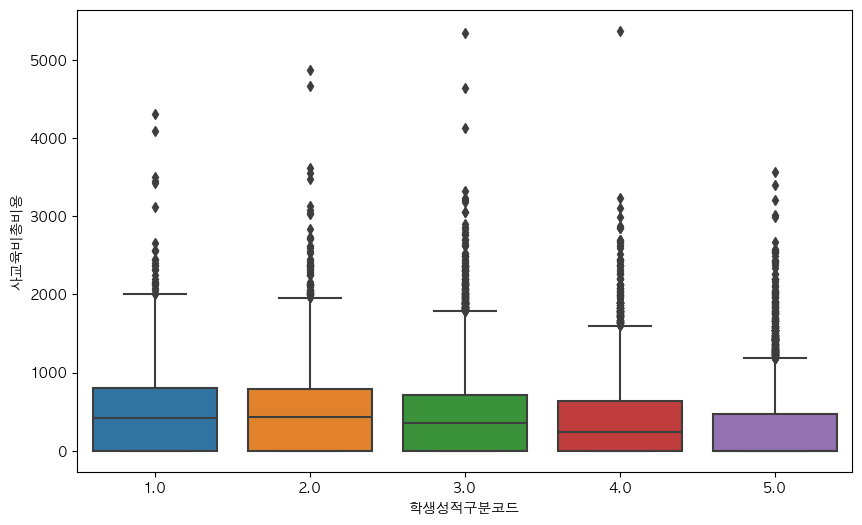

In [13]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

    
plt.figure(figsize=(10,6))

sns.boxplot(x=highschool_onehot['학생성적구분코드'], y=highschool_onehot['사교육비총비용'])
plt.xlabel('학생성적구분코드')
plt.ylabel('사교육비총비용')
plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [14]:
highschool_onehot['학생성적구분코드'] = highschool_onehot['학생성적구분코드'].map(
    {1: '상위',2: '상위', 3:'중위', 4: '하위', 5: '하위'})
grade_onehot = pd.get_dummies(highschool_onehot['학생성적구분코드'], dtype=int, prefix='학생성적구분')
df = pd.concat([highschool_onehot, grade_onehot], axis=1)

In [15]:
df.head()

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,학생성적구분_상위,학생성적구분_중위,학생성적구분_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,상위,71.0,61.0,2.0,4,NaN,1,0,1,0,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,중위,51.0,51.0,3.0,6,NaN,1,0,0,1,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,하위,31.0,41.0,3.0,4,NaN,1,0,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,하위,51.0,51.0,3.0,1,NaN,1,0,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,하위,71.0,62.0,1.0,8,NaN,1,0,0,0,1


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A:  
Label Encoding
- 문자열로 된 범주형 변수를 코드형 숫자 값으로 변환하는 방식  

One Hot Encoding
- 고유 값에 해당하는 컬럼은 1, 나머지 컬럼에는 0을 표시하는 방식

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [16]:
df.drop('학생성적구분코드', axis=1, inplace=True)
df.drop('학생성적구분_중위', axis=1, inplace=True)
df.head()

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,학생성적구분_상위,학생성적구분_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,0,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,0,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0,1


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A:  
다중공선성은 회귀 분석에서 독립 변수들 간에 강한 상관 관계가 있는 경우 발생하는 문제이다.  
One Hot Encoding을 한 경우 dummy variable이 서로 상관 관계를 가지며 다중공선성을 더욱 악화시킬 수 있다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

<Figure size 1000x600 with 0 Axes>

<Axes: >

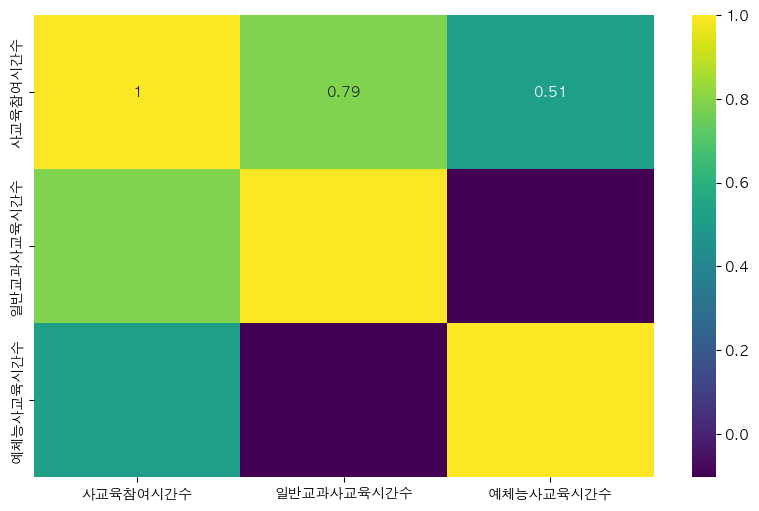

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']].corr(), 
            annot=True,cmap='viridis')
plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [18]:
df.isnull().sum()

방과후학교참여시간수          0
사교육참여시간수            0
일반교과사교육시간수          0
예체능사교육시간수           0
사교육비총비용             0
총자녀수                0
부_교육정도코드         1569
모_교육정도코드          978
부모경제활동코드          105
월평균가구소득코드           0
진학희망고등학교유형코드    30052
참여                  0
미참여                 0
학생성적구분_상위           0
학생성적구분_하위           0
dtype: int64

In [19]:
df.isnull().sum(axis=0) / len((df))

방과후학교참여시간수      0.000000
사교육참여시간수        0.000000
일반교과사교육시간수      0.000000
예체능사교육시간수       0.000000
사교육비총비용         0.000000
총자녀수            0.000000
부_교육정도코드        0.052210
모_교육정도코드        0.032544
부모경제활동코드        0.003494
월평균가구소득코드       0.000000
진학희망고등학교유형코드    1.000000
참여              0.000000
미참여             0.000000
학생성적구분_상위       0.000000
학생성적구분_하위       0.000000
dtype: float64

In [20]:
df.drop('진학희망고등학교유형코드', axis=1, inplace=True)

In [21]:
df.dropna(inplace=True)
df.shape

(27610, 14)

In [22]:
df.head()

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,참여,미참여,학생성적구분_상위,학생성적구분_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,1,0,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,1,0,0,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,1,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,1,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,1,0,0,1


In [23]:
df.isnull().sum()

방과후학교참여시간수    0
사교육참여시간수      0
일반교과사교육시간수    0
예체능사교육시간수     0
사교육비총비용       0
총자녀수          0
부_교육정도코드      0
모_교육정도코드      0
부모경제활동코드      0
월평균가구소득코드     0
참여            0
미참여           0
학생성적구분_상위     0
학생성적구분_하위     0
dtype: int64

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [24]:
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_target = df['사교육비총비용']
X_features = df.drop('사교육비총비용',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [25]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(rmse)

307.62492648212617


In [27]:
print(lr_reg.score(X_train, y_train))
print(lr_reg.score(X_test, y_test))
print(r2_score(y_test, pred))

0.6183238859746356
0.6099057016965064
0.6099057016965064


In [28]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [29]:
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(rmse)

307.62492648212617


In [30]:
print(lr_reg.score(X_train, y_train))
print(lr_reg.score(X_test, y_test))
print(r2_score(y_test, pred))

0.6183238859746356
0.6099057016965064
0.6099057016965064
